##**LOADING DATASET**

In [ ]:
import zipfile
path = "/content/drive/MyDrive/archive.zip"
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close() 

##**Import the libraries**

In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from tensorflow import keras
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

##**Preparing the data for VGG**
vgg is an Visual Geometry Group. we are using vgg as model, to extract the features more effeciently


In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/chest_xray/train'
valid_path = '/content/chest_xray/test'

Not including the top layers of the model

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False


In [ ]:
folders = glob('/content/chest_xray/train/*')
x = Flatten()(vgg.output)

##**Model selection**

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer = tf.keras.optimizers.Adam(),
  metrics=['accuracy']
)

##**Preparing for ImageDatagenerator**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)




# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')




test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


##**Training the model**

In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=1,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

522/522 [==============================] - 153s 271ms/step - loss: 0.2028 - accuracy: 0.9285 - val_loss: 0.3476 - val_accuracy: 0.9119


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("Peno.tflite", 'wb') as f:
  f.write(tflite_model)

##**Loading the Model**

In [ ]:
import tensorflow as tf
from keras.models import load_model

model.save('Pneumonia_detection_model.h5')

In [ ]:
from keras.models import load_model
import keras.utils as image
from keras.applications.vgg16 import preprocess_input

In [ ]:
model=load_model('Pneumonia_detection_model.h5')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
tflite_model_path = '/content/model.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array 

In [ ]:
img=image.load_img('/content/chest_xray/val/PNEUMONIA/person1950_bacteria_4881.jpeg',target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
img_data=preprocess_input(x)

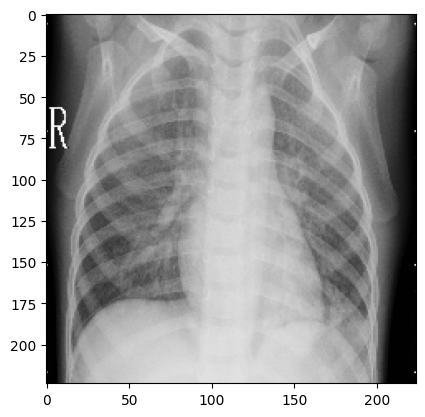

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img)

In [ ]:
classes=model.predict(img_data)

1/1 [==============================] - 1s 742ms/step


In [ ]:
result=int(classes[0][0])

In [ ]:
result

0

##**Detection**

In [ ]:

if result==0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")

Person is Affected By PNEUMONIA


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
